In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import csv

In [ ]:
calls = pd.read_csv('calls.csv')

In [ ]:
print("Calls DataFrame:")
calls.head()

Calls DataFrame:


,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,08-01-2024 00:03,08-01-2024 00:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,08-01-2024 00:03,08-01-2024 00:06,08-01-2024 00:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,08-01-2024 00:07,08-01-2024 00:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,08-01-2024 00:05,08-01-2024 00:10,08-01-2024 00:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,08-01-2024 00:04,08-01-2024 00:14,08-01-2024 00:23,\n\nAgent: Thank you for calling United Airlin...


In [ ]:
customers = pd.read_csv('customers.csv')
customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [ ]:
sentiment = pd.read_csv('sentiment_statistics.csv')
sentiment.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [ ]:
reason = pd.read_csv('reason.csv')
reason.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168


---
##Data conversions and transformation


In [ ]:
# Replace slashes with dashes for standardization
calls['call_start_datetime'] = calls['call_start_datetime'].str.replace('/', '-')
calls['agent_assigned_datetime'] = calls['agent_assigned_datetime'].str.replace('/', '-')
calls['call_end_datetime'] = calls['call_end_datetime'].str.replace('/', '-')

In [ ]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'], errors='coerce')
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'], errors='coerce')
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'], errors='coerce')

In [ ]:
calls['handle_time'] = calls['call_end_datetime'] - calls['agent_assigned_datetime']
calls['waiting_time'] = calls['agent_assigned_datetime'] - calls['call_start_datetime']

In [ ]:
total_handle_time = calls['handle_time'].sum()
total_waiting_time = calls['waiting_time'].sum()
total_calls = len(calls)

In [ ]:
#Calculate AHT and AST
average_handle_time = total_handle_time / total_calls
average_speed_to_answer = total_waiting_time / total_calls

# Convert the results to minutes for better readability
average_handle_time_minutes = average_handle_time.total_seconds() / 60
average_speed_to_answer_minutes = average_speed_to_answer.total_seconds() / 60

# Output results
print(f"Average Handle Time (AHT) in minutes: {average_handle_time_minutes:.2f}")
print(f"Average Speed to Answer (AST) in minutes: {average_speed_to_answer_minutes:.2f}")

Average Handle Time (AHT) in minutes: 11.62
Average Speed to Answer (AST) in minutes: 7.28


In [ ]:
reason.isnull().sum()

,0
call_id,0
primary_call_reason,0


In [ ]:
reason['primary_call_reason'].unique()

array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', 'Voluntary   Change', 'Post Flight',
       'Check In', 'Other  Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'IRROPS  ', 'Digital   Support',
       'Seating  ', 'Disability', 'Unaccompanied Minor', ' Baggage',
       'Traveler  Updates', 'Communications  ', 'ETC', 'Upgrade  ',
       'Unaccompanied Minor  ', 'Voluntary Change', 'Voluntary Change  ',
       'Checkout  ', 'Mileage Plus', 'Mileage Plus  ', 'Booking  ',
       'Baggage  ', 'Post-Flight', 'Post-Flight  ', 'Schedule Change  ',
       'Baggage', 'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Support', 'Mileage  P

In [ ]:
# Clean the 'primary_call_reason' column
reason['primary_call_reason'] = (
    reason['primary_call_reason']
    .str.strip()  # Remove leading and trailing spaces
    .str.replace(r'\s+', ' ', regex=True))  # Replace multiple spaces with a single space

In [ ]:
reason['primary_call_reason'].unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post Flight',
       'Check In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC',
       'Post-Flight', 'Check-In', 'Products and Services'], dtype=object)

In [ ]:
reason['primary_call_reason'] = reason['primary_call_reason'].str.replace('Post-Flight', 'Post Flight')
reason['primary_call_reason'] = reason['primary_call_reason'].str.replace('Products & Services', 'Products and Services')
reason['primary_call_reason'] = reason['primary_call_reason'].str.replace('Check-In', 'Checkin')
reason['primary_call_reason'] = reason['primary_call_reason'].str.replace('Check In', 'Checkin')
reason['primary_call_reason'] = reason['primary_call_reason'].str.replace('ETC', 'Other Topics')

In [ ]:
reason['primary_call_reason'].unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post Flight',
       'Checkin', 'Other Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'],
      dtype=object)

In [ ]:
reason['primary_call_reason'].nunique()

20

In [ ]:
reason['primary_call_reason'].value_counts()

,count
primary_call_reason,
IRROPS,13311
Voluntary Change,10848
Seating,6365
Mileage Plus,5851
Post Flight,4330
Communications,3840
Products & Services,3332
Baggage,2832
Upgrade,2738


Therefore, most calls were made for IRROPS and least for Unaccompanied Minor. Although they might have have highest or lowest AHT and AST. They too have been calculated ahead.

In [ ]:
def merge_dataframes(df1, df2, on, how='inner'):
    return pd.merge(df1, df2, on=on, how=how)

In [ ]:
call_reason = merge_dataframes(calls, reason, on='call_id')

# Calculate AHT for the most frequent reason (IRROPS)
aht_most_freq = call_reason[call_reason['primary_call_reason'] == 'IRROPS']['handle_time'].mean()
aht_most_freq_minutes = aht_most_freq.total_seconds() / 60

# Calculate AHT for the least frequent reason (Unaccompanied Minor)
aht_least_freq = call_reason[call_reason['primary_call_reason'] == 'Unaccompanied Minor']['handle_time'].mean()
aht_least_freq_minutes = aht_least_freq.total_seconds() / 60

# Calculate the percentage difference
percentage_difference = ((aht_most_freq - aht_least_freq) / aht_least_freq) * 100

# Display the results
print(f"AHT for Most Frequent Reason (IRROPS): {aht_most_freq_minutes: .2f} minutes")
print(f"AHT for Least Frequent Reason (Unaccompanied Minor): {aht_least_freq_minutes: .2f} minutes")
print(f"Percentage Difference: {percentage_difference:.2f}%")

AHT for Most Frequent Reason (IRROPS):  13.09 minutes
AHT for Least Frequent Reason (Unaccompanied Minor):  8.65 minutes
Percentage Difference: 51.21%


---
Therefore, there is 51.21% difference between the average handling time for the most frequent (IRROPS) and least frequent (Unaccompanied Minor) call reasons.

---

Hint for ahead: Check what factor are causing IRROPS call time to increase. and if those factors are any different for unaccompanied minor, then we can train agent to handle situation is similar way.

In [ ]:
# Find the row with the maximum handling time
max_handle_time_row = call_reason.loc[call_reason['handle_time'].idxmax()]
max_reason = max_handle_time_row['primary_call_reason']
max_time = max_handle_time_row['handle_time'].total_seconds() / 60

# Find the row with the minimum handling time
min_handle_time_row = call_reason.loc[call_reason['handle_time'].idxmin()]
min_reason = min_handle_time_row['primary_call_reason']
min_time = min_handle_time_row['handle_time'].total_seconds() / 60

# Print the results
print(f"Maximum handling time was for '{max_reason}', with a time of {max_time:.2f} minutes.")
print(f"Minimum handling time was for '{min_reason}', with a time of {min_time:.2f} minutes.")


Maximum handling time was for 'Post Flight', with a time of 119.00 minutes.
Minimum handling time was for 'IRROPS', with a time of 0.00 minutes.


---
Now I want to check if each agent is handling only one type of call reason, or multiple

In [ ]:
# Group by agent and count the number of unique call reasons they handle
agent_call_reason_counts = call_reason.groupby('agent_id')['primary_call_reason'].nunique()

# Filter agents who handle more than one type of call reason
multiple_call_reason_agents = agent_call_reason_counts[agent_call_reason_counts > 1]

# Filter agents who handle only one type of call reason
single_call_reason_agents = agent_call_reason_counts[agent_call_reason_counts == 1]

# Print the results
print(f"Agents handling multiple call reasons: {len(multiple_call_reason_agents)}")
print(f"Agents handling only one call reason: {len(single_call_reason_agents)}")



Agents handling multiple call reasons: 378
Agents handling only one call reason: 5


In [ ]:
calls['agent_id'].nunique()

383

Now, there are total 383 agents who work hard towards resolving our problem on these customer helpline calls. Out of these 383, only 5 agents handle calls only for 1 reason, where as 378 agents take up calls for multiple reasons. But, if the agents will be dedicated towards a particular call reason, if will save them time switching between different tabs. This will reduce handling time (AHT), and henceforth increase the number of calls that can be taken by an agent, reducing waiting time of customer, and increasing Average Speed to Answer(AST).

Therefore, suggestion 1: Ask the customer to specify call reason in IVR system itself, and then direct the call to specific agent handling that call reason.

---
Now, trying to calculate AHT and AST for each reason


In [ ]:
# Group by primary call reason and calculate AHT and AST
aht_ast_by_reason = call_reason.groupby('primary_call_reason').agg(
    AHT=('handle_time', lambda x: x.mean().total_seconds() / 60),  # Convert handle_time to minutes
    AST=('waiting_time', lambda x: x.mean().total_seconds() / 60)  # Convert waiting_time to minutes
)

# Display the result
print(aht_ast_by_reason)


                           AHT        AST
primary_call_reason                      
Baggage               5.560734   9.034958
Booking               7.128934   4.003792
Checkin               9.568803   5.930672
Checkout             16.947564  12.078390
Communications       13.778646   3.999479
Digital Support       6.204898   8.428571
Disability            4.868486   8.392060
ETC                  16.048319   9.071429
IRROPS               13.085268   6.001352
Mileage Plus         16.592890   6.016920
Other Topics          5.834963   3.979218
Post Flight          15.548268   9.490531
Products & Services  12.442677   5.040816
Schedule Change       8.166895   4.013680
Seating               7.916575   9.513747
Traveler Updates      6.553895  11.500534
Unaccompanied Minor   8.653846  11.471154
Upgrade              10.539080   4.974799
Voluntary Cancel     12.031114   8.991910
Voluntary Change     10.652563   9.008112


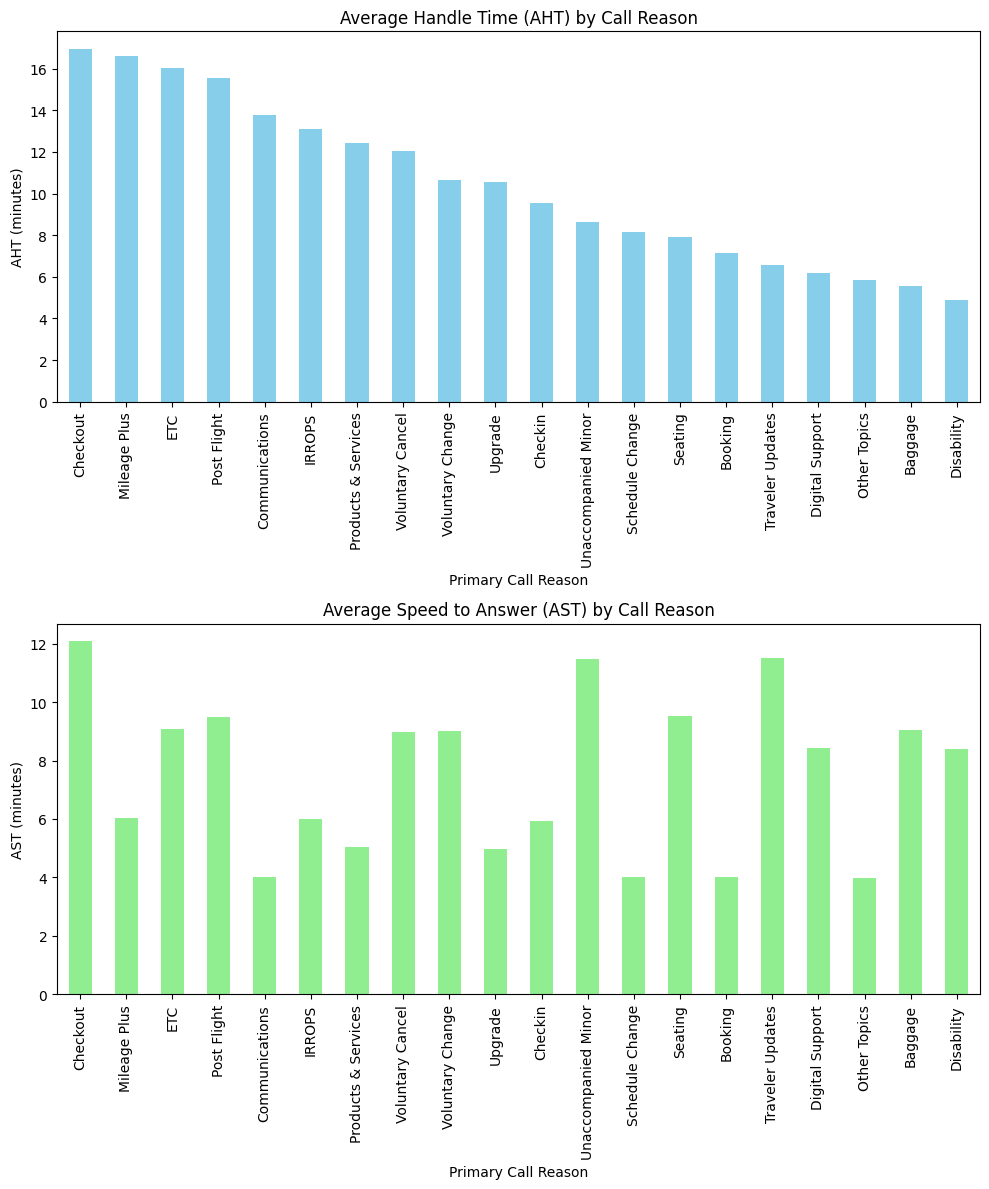

In [ ]:
# Sort the data by AHT and AST for better visualization
aht_ast_by_reason_sorted = aht_ast_by_reason.sort_values(by='AHT', ascending=False)

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Bar plot for AHT
aht_ast_by_reason_sorted['AHT'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Average Handle Time (AHT) by Call Reason')
ax[0].set_ylabel('AHT (minutes)')
ax[0].set_xlabel('Primary Call Reason')

# Bar plot for AST
aht_ast_by_reason_sorted['AST'].plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Average Speed to Answer (AST) by Call Reason')
ax[1].set_ylabel('AST (minutes)')
ax[1].set_xlabel('Primary Call Reason')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
aht_ast_by_reason_sorted

,AHT,AST
primary_call_reason,,
Checkout,16.947564,12.078390
Mileage Plus,16.592890,6.016920
ETC,16.048319,9.071429
Post Flight,15.548268,9.490531
Communications,13.778646,3.999479
IRROPS,13.085268,6.001352
Products & Services,12.442677,5.040816
Voluntary Cancel,12.031114,8.991910
Voluntary Change,10.652563,9.008112


Next we checked the AHT and AST taken for each reason to see if there are any reasons which generally take more time as compared to others. And the reasons which have highest Average Handling Time are Checkouts, Mileage PLus, ETC and Post Flight. So they can have more agents dedicately catoring to these reasons, this is enable them to take more calls for these reasons, and hence reduce average handling time.

Also, reasons such as Unaccompanied Minor, Traveler Updates, Seating, Baggage, Digital Support and Disability has comparitively lesser average handling time, yet have average servive time indicating that they have to unnecessary wait for agents to take their call. So, even a few dedicated agents for these reasons can help reduce their waiting time, and hence average service time.

Next task: Mode Sentiment for each call reason

In [ ]:
def get_calls_by_customer(customer_id):
    return calls[calls['customer_id'] == customer_id]

def get_calls_by_agent(agent_id):
    return calls[calls['agent_id'] == agent_id]

def get_sentiment_by_call(call_id):
    return sentiment[sentiment['call_id'] == call_id]
